# Custom ROI Tutorial

This tutorial is meant to show how to use the PlantCV custom Region of Interest tool, with hard-coded vertices (which can be utilized in parallel). 

First, import the necessary Python packages. 

In [1]:
%matplotlib notebook
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

In [2]:
# Input/output options
args = WorkflowInputs(
    images=["./imgs/segmented_leaves.jpg"],
    names="image",
    result="example_results.json",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

In [3]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.line_thickness=10

<IPython.core.display.Javascript object>


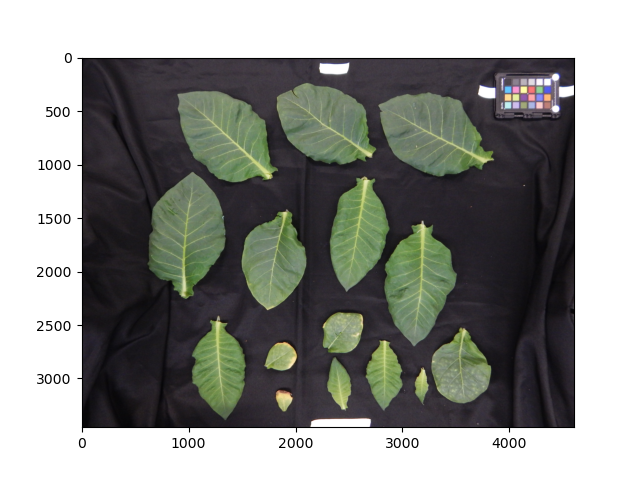

In [4]:
# Read in your image, which is based on the path you put above

img, path, filename = pcv.readimage(filename=args.image)


<IPython.core.display.Javascript object>


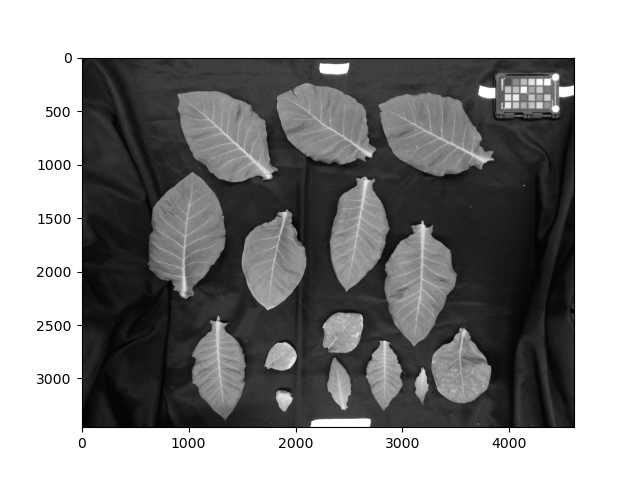

In [5]:
# Convert to grayscale so we can threshold the plant out 
l_gray = pcv.rgb2gray_lab(rgb_img=img, channel="l")

<IPython.core.display.Javascript object>


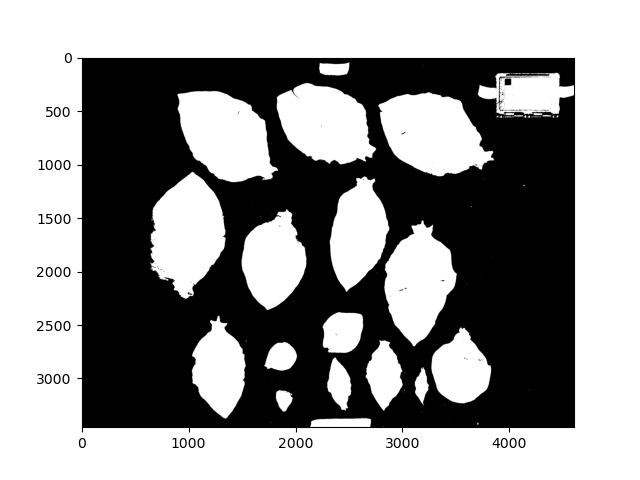

In [6]:
# Automatic thresholding where the object is lighter than the background 
bin_mask = pcv.threshold.otsu(gray_img=l_gray, object_type="light")

<IPython.core.display.Javascript object>


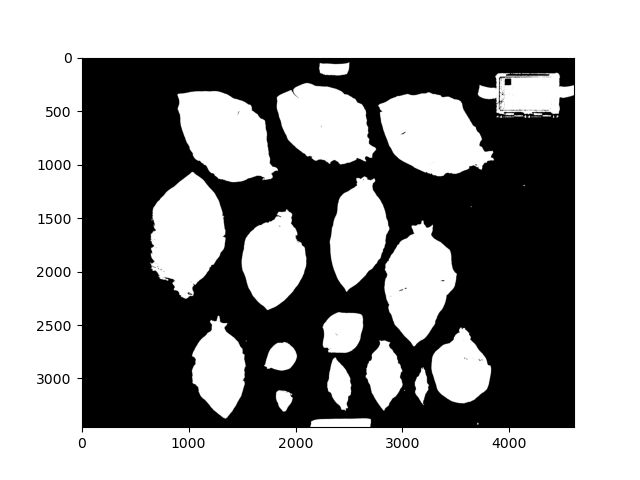

In [7]:
# Fill in small objects if below the "size" threshold
cleaner_mask = pcv.fill(bin_img=bin_mask, size=50)

<IPython.core.display.Javascript object>


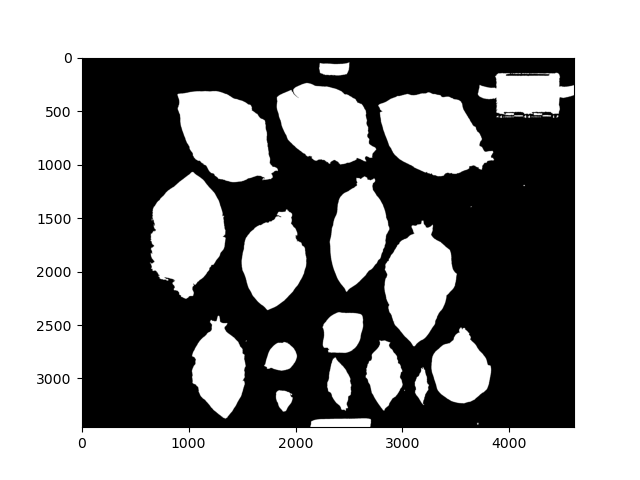

In [8]:
# Flood fill any holes in the leaves (false negative pixels)
clean_mask = pcv.fill_holes(cleaner_mask)
# Having less noise will help the speed of the filtering step, which can be slow for large images 

<IPython.core.display.Javascript object>


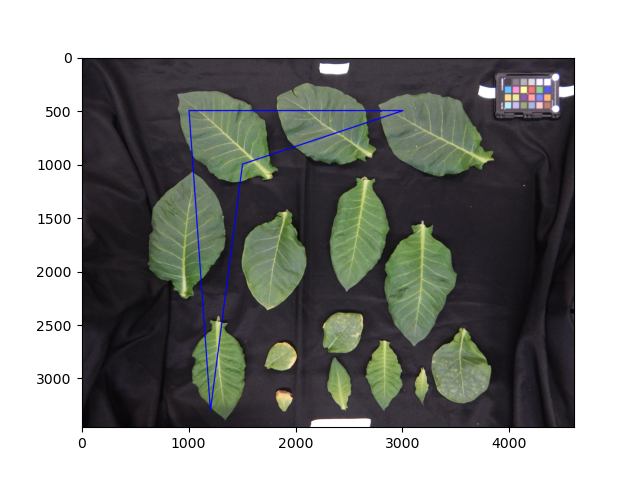

In [9]:
# Define the region of interest (ROI). 
# This example shows how to subset your leaves, maybe there were two treatments per image 
# and you're interested in labeling the replicates 

roi1 = pcv.roi.custom(img=img, vertices=[(1200,3300),(1000,500),(3000,500),(1500,1000)])



<IPython.core.display.Javascript object>


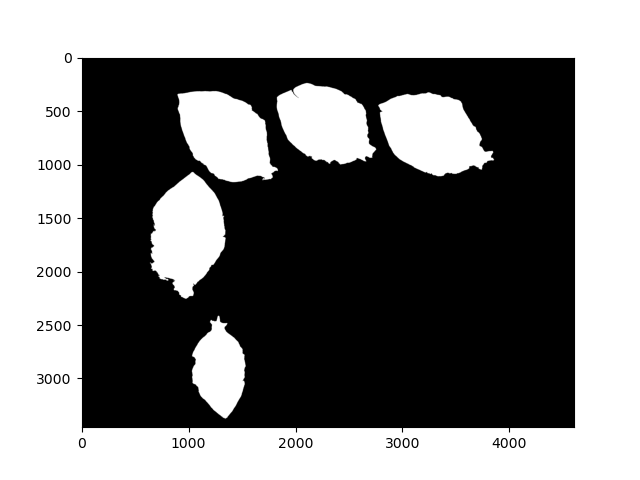

In [10]:
# Make a new filtered mask that only keeps the leaves in your ROI and not objects outside of the ROI
# We have set to partial here so that if a leaf overlaps your ROI it will still be selected. 
# Inputs:
#    mask            = the clean mask you made above
#    roi            = the region of interest you specified above
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)

kept_mask  = pcv.roi.filter(mask=clean_mask, roi=roi1, roi_type='partial')


<IPython.core.display.Javascript object>


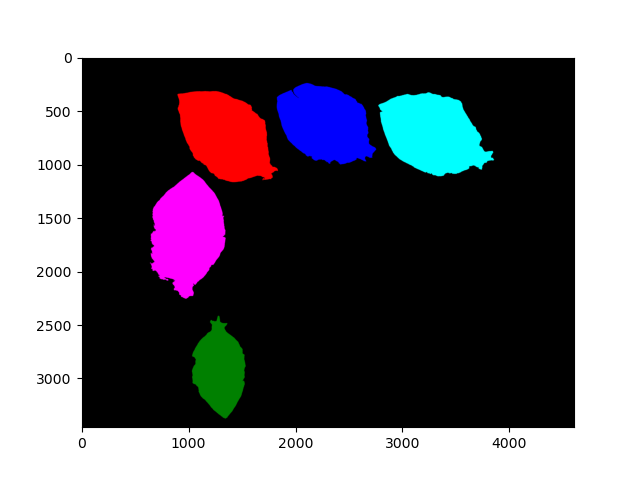

In [11]:
#Label the objects in your region of interest and number them
#Each object should be a different color. 
# If your objects are the same color and/or are touching, go back to your mask so that they are separate 
# or it will treat them as a single object

labeled_objects, n_obj = pcv.create_labels(mask=kept_mask)

<IPython.core.display.Javascript object>


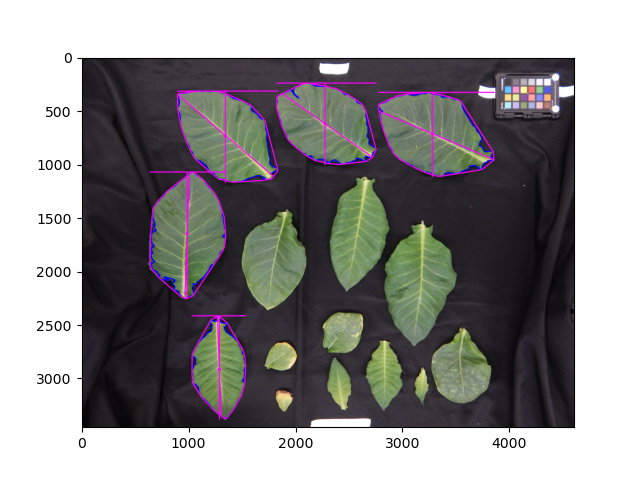

In [13]:
# After ROI filtering, you might look to extract size traits from each leaf replicate 
shape_img = pcv.analyze.size(img=img, labeled_mask=labeled_objects, n_labels=n_obj)

In [ ]:
# Save stored data out to a file 

pcv.outputs.save_results(filename=args.result, outformat="json")